# Set working directory and import modules

In [1]:
import os
# Change working directory to the root of the repository (assumes notebook working directory is `tutorials`)
os.chdir('..')
import main
from util.plot_hd import plot_hawk_and_dove, plot_hd_from_file
from fitness.game_theory_game import HawkAndDove
from typing import List, Tuple

# Run Iterated Prisoners Dilemma with two different player strategies

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


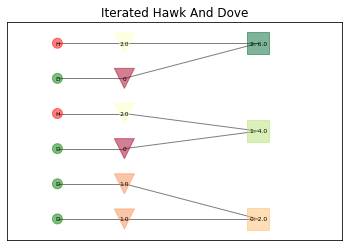

In [2]:
# Strategy for always 'hawking' (aggressor)
player_1 = lambda h, i: "D"
# Strategy for aggressing if opponent was dove previous turn
player_2 = lambda h, i: "H" if h[i] == "D" else "D"
n_iterations = 3
memory_size = 1
# Setup a prisoners dilemma engagment
pd = HawkAndDove(n_iterations=n_iterations, memory_size=memory_size, store_stats=True, out_file_name=HawkAndDove.DEFAULT_OUT_FILE)
# Run the strategies against each other
sentences, histories = pd.run(player_1=player_1, player_2=player_2)
# Plot the choices and the payoffs from the engagement
plot_hawk_and_dove(sentences, pd.revise_history(histories), out_path='.')

# Run the heuristic search

In [3]:
# Set to use the configuration file and output directory
args = ["-f", "tests/configurations/hawk_and_dove.yml", "-o", "tmp"]
_ = main.main(args)

Namespace(coev=False, configuration_file='tests/configurations/hawk_and_dove.yml', output_dir='tmp')
Setting random seed: 1 0.13436
donkey_ge settings: {'population_size': 4, 'max_length': 10, 'elite_size': 1, 'generations': 3, 'tournament_size': 2, 'seed': 1, 'crossover_probability': 0.8, 'mutation_probability': 0.1, 'codon_size': 127, 'integer_input_element_max': 1000, 'bnf_grammar': 'tests/grammars/hawk_and_dove.bnf', 'fitness_function': {'name': 'HawkAndDove', 'opponent': "lambda h, i: 'D'", 'n_iterations': 4}, 'output_dir': 'tmp', 'coev': False, 'brynset': 'hello'}
Gen:0 t:0.001 fit_ave:-7.00+-1.732 size_ave:3.50+-0.866 length_ave:10.00+-0.000 Ind: lambda h, i: "H" if h[i] == "H" else "D"; -4.0
Gen:1 t:0.001 fit_ave:-5.25+-1.639 size_ave:4.00+-0.000 length_ave:10.50+-1.118 Ind: lambda h, i: "D" if h[i] == "H" else "D"; -4.0
Gen:2 t:0.000 fit_ave:-4.00+-0.000 size_ave:3.50+-0.866 length_ave:10.00+-0.000 Ind: lambda h, i: "D"; -4.0
Cache entries:8 Total Fitness Evaluations:48 Fitnes

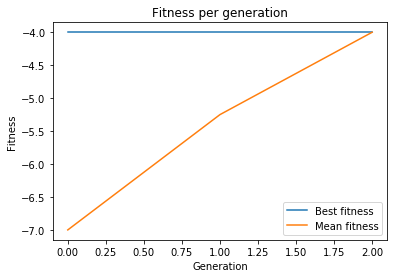

In [4]:
from util.plot_donkey_ge import plot_fitness
# Plot fitness from a search
plot_fitness(in_path="tmp")

# Run the coevlutionary search

In [5]:
args = ["-o", "tmpcoev", "-f", "tests/configurations/coevolution_hawk_and_dove.yml", "--coev"]
_ = main.main(args)

Namespace(coev=True, configuration_file='tests/configurations/coevolution_hawk_and_dove.yml', output_dir='tmpcoev')
Setting random seed: 1 0.13436
donkey_ge settings: {'population_size': 4, 'max_length': 100, 'generations': 2, 'tournament_size': 2, 'seed': 1, 'crossover_probability': 0.8, 'mutation_probability': 0.1, 'codon_size': 127, 'integer_input_element_max': 1000, 'elite_size': 1, 'populations': {'attacker': {'adversary': 'defender', 'bnf_grammar': 'tests/grammars/hawk_and_dove.bnf', 'fitness_function': {'name': 'HawkAndDove', 'opponent': 'None', 'n_iterations': 4}}, 'defender': {'adversary': 'attacker', 'bnf_grammar': 'tests/grammars/hawk_and_dove.bnf', 'fitness_function': {'name': 'HawkAndDove', 'opponent': 'None', 'n_iterations': 4}}}, 'output_dir': 'tmpcoev', 'coev': True, 'brynset': 'hello'}
attacker 12
Gen:0 t:0.002 fit_ave:-1.38+-0.415 size_ave:4.00+-1.414 length_ave:100.00+-0.000 Ind: lambda h, i: "D" if h[i] == "H" else "H"; -0.75
defender 24
Gen:0 t:0.002 fit_ave:-0.19+

In [6]:
plot_fitness(in_path="tmpcoev")